<a href="https://colab.research.google.com/github/Salvika11/Bioinformatics/blob/main/Salvika_Retrieval_of_medical_imaging_records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydicom

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 100 image files in /content/drive/My Drive/CTimages.
First 5 image files:
/content/drive/My Drive/CTimages/ID_0004_AGE_0056_CONTRAST_1_CT.dcm
/content/drive/My Drive/CTimages/ID_0009_AGE_0048_CONTRAST_1_CT.dcm
/content/drive/My Drive/CTimages/ID_0015_AGE_0061_CONTRAST_1_CT.dcm
/content/drive/My Drive/CTimages/ID_0026_AGE_0070_CONTRAST_1_CT.dcm
/content/drive/My Drive/CTimages/ID_0011_AGE_0061_CONTRAST_1_CT.dcm

Loading and displaying the first image: /content/drive/My Drive/CTimages/ID_0004_AGE_0056_CONTRAST_1_CT.dcm


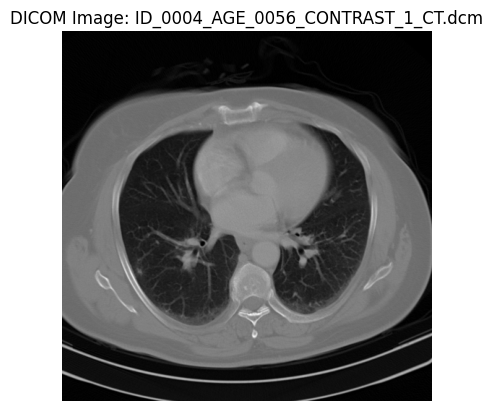

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive

drive.mount('/content/drive')
local_folder_path = '/content/drive/My Drive/CTimages'

# Function to find image files (JPG/PNG/DICOM) in a directory
# Added .dcm for potential local DICOM files as well
def find_image_files_local(directory):
    image_files = []
    if not os.path.isdir(directory):
        print(f"Error: Directory not found at {directory}")
        return image_files

    for root, _, files in os.walk(directory):
        for file in files:
            # Convert file extension to lowercase for case-insensitive checking
            lower_file = file.lower()
            if lower_file.endswith(('.png', '.jpg', '.jpeg', '.dcm')):
                image_files.append(os.path.join(root, file))
    return image_files

# Find all image files in the specified local directory
all_image_files = find_image_files_local(local_folder_path)

# Print the total number of images found and the first few file paths
print(f"Found {len(all_image_files)} image files in {local_folder_path}.")
print("First 5 image files:")
for img_path in all_image_files[:5]:
    print(img_path)

# --- Load and display one image ---
if all_image_files:
    # Select the first image file as an example
    example_image_path = all_image_files[0]
    print(f"\nLoading and displaying the first image: {example_image_path}")

    try:
        # Check if the image is a DICOM file or standard image
        if example_image_path.lower().endswith('.dcm'):
            import pydicom as dicom
            ds = dicom.dcmread(example_image_path)
            plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
            plt.title(f"DICOM Image: {os.path.basename(example_image_path)}")
        else:
            img = mpimg.imread(example_image_path)
            plt.imshow(img)
            plt.title(f"Image: {os.path.basename(example_image_path)}")

        plt.axis('off') # Hide axes
        plt.show()

    except Exception as e:
        print(f"Error loading or displaying image {example_image_path}: {e}")
else:
    print("\nNo image files found in the specified directory.")

# --- End: Code to mount Google Drive and find, load, and display images ---
